# Introduction

Compare the read lengths between what made it to the bams and whats in the fastqs.

In [1]:
import pandas

import seaborn
from matplotlib import pyplot

In [2]:
bam_reads = pandas.read_csv("bam_read_summary.csv", index_col=0, header=[0,1])
print(bam_reads.shape)
bam_reads.head()

(138, 36)


primary                                                  \
                     count         mean         std    min     25%     50%   
ENCSR293MOX_1_1   683140.0  1209.884494  866.069058  300.0   587.0   913.0   
ENCSR081NRO_1_1   854940.0  1386.843563  933.383143  300.0   730.0  1243.0   
ENCSR257JBF_1_2   770389.0  1540.944205  987.192926  300.0   855.0  1433.0   
ENCSR257JBF_1_1   715098.0  1471.351878  927.762674  300.0   825.0  1406.0   
ENCSR838WFC_1_1  2135001.0  1607.560022  717.466194   80.0  1045.0  1568.0   

                                         non_primary  ... unaligned  \
                    75%      max  median       count  ...    median   
ENCSR293MOX_1_1  1583.0  20450.0   913.0     44553.0  ...     533.0   
ENCSR081NRO_1_1  1743.0  20435.0  1243.0     61457.0  ...     576.0   
ENCSR257JBF_1_2  1856.0  20390.0  1433.0     53707.0  ...    1337.0   
ENCSR257JBF_1_1  1774.0  19854.0  1406.0     50903.0  ...     992.0   
ENCSR838WFC_1_1  2082.0  12755.0  1568.0     13932.0  ...      72.0   

                     total                                                 \
                     count         mean         std   min     25%     50%   
ENCSR293MOX_1_1   734723.0  1209.430372  871.409418  81.0   574.0   914.0   
ENCSR081NRO_1_1   918423.0  1383.144401  936.996919  80.0   722.0  1235.0   
ENCSR257JBF_1_2   829052.0  1541.419548  991.463472  80.0   847.0  1432.0   
ENCSR257JBF_1_1   773020.0  1466.718856  930.325307  80.0   814.0  1402.0   
ENCSR838WFC_1_1  2151100.0  1599.280992  722.153420  50.0  1035.0  1559.0   

                                          
                    75%      max  median  
ENCSR293MOX_1_1  1591.0  20450.0   914.0  
ENCSR081NRO_1_1  1743.0  20435.0  1235.0  
ENCSR257JBF_1_2  1870.0  20390.0  1432.0  
ENCSR257JBF_1_1  1780.0  19854.0  1402.0  
ENCSR838WFC_1_1  2077.0  12755.0  1559.0  

[5 rows x 36 columns]

In [3]:
fastq_reads = pandas.read_csv("fastq_lengths.csv", index_col=0, header=[0])
print(fastq_reads.shape)
fastq_reads.head()

(138, 9)


,count,mean,median,std,min,25%,50%,75%,max
ENCSR293MOX_1_1,690170.0,1205.590579,912.0,868.004579,300.0,577.0,912.0,1578.0,20450.0
ENCSR081NRO_1_1,856966.0,1386.103723,1240.0,935.032789,300.0,729.0,1240.0,1743.0,20435.0
ENCSR257JBF_1_1,722117.0,1468.418269,1404.0,928.986870,300.0,821.0,1404.0,1772.0,19854.0
ENCSR257JBF_1_2,775345.0,1539.440640,1431.0,987.833987,300.0,854.0,1431.0,1854.0,20390.0
ENCSR838WFC_1_1,2137168.0,1606.083173,1567.0,718.682934,50.0,1044.0,1567.0,2082.0,12755.0


In [4]:
read_counts = pandas.merge(bam_reads[[("primary", "count")]], fastq_reads[["count"]], left_index=True, right_index=True)
read_counts.columns = ["aligned_read_count", "fastq_read_count"]

/usr/lib/python3/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


In [5]:
read_counts["aligned_gt"] = (read_counts["aligned_read_count"] > read_counts["fastq_read_count"])
read_counts

,aligned_read_count,fastq_read_count,aligned_gt
ENCSR293MOX_1_1,683140.0,690170.0,False
ENCSR081NRO_1_1,854940.0,856966.0,False
ENCSR257JBF_1_2,770389.0,775345.0,False
ENCSR257JBF_1_1,715098.0,722117.0,False
ENCSR838WFC_1_1,2135001.0,2137168.0,False
...,...,...,...
ENCSR463IDK_1_1,2223209.0,2255491.0,False
ENCSR316ZTD_1_1,2732454.0,2796483.0,False
ENCSR462COR_1_1,3014382.0,3152341.0,False
ENCSR257YUB_1_1,2860061.0,2904443.0,False


In [6]:
read_counts["aligned_gt"].sum()

0

In [7]:
fastq_reads["count"].sum()

217913736.0

<AxesSubplot:xlabel='fastq_read_count', ylabel='aligned_read_count'>

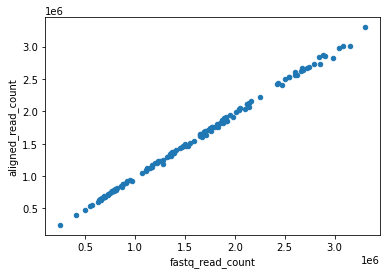

In [9]:
read_counts.plot.scatter(x="fastq_read_count", y="aligned_read_count")

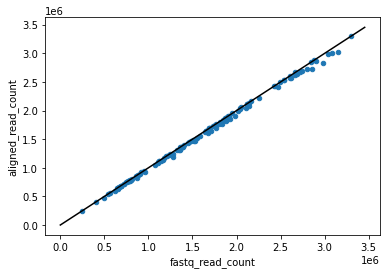

In [10]:
f = pyplot.figure()
ax = f.add_subplot(1,1,1)
read_counts.plot.scatter(x="fastq_read_count", y="aligned_read_count", ax=ax)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
_ = ax.plot([0,xmax], [0,ymax], color='k')

# primary median read length vs fastq read length

/usr/lib/python3/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


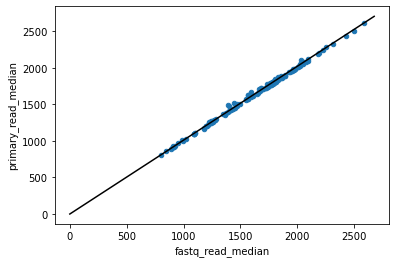

In [11]:
f = pyplot.figure()
ax = f.add_subplot(1,1,1)

primary_median = pandas.merge(bam_reads[[("primary", "median")]], fastq_reads[["median"]], left_index=True, right_index=True)
primary_median.columns = ["primary_read_median", "fastq_read_median"]
primary_median.plot.scatter(x="fastq_read_median", y="primary_read_median", ax=ax)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
_ = ax.plot([0,xmax], [0,ymax], color='k')